# 1 Author

**Utkarsh Kumar Sharma**

# 2 Problem formulation

---
The machine learning problem I've chosen is to classify if the food in the image is `Asian` or `Non-Asian`. While exploring I found that the Asian food has a totally different way of preperation and analysis. Similarly, If one have to analyse a Asian food data, the first thing would be to classify if the food is Asian or Non-Asian. Hence I chose this problem statement.

---

# 3 Machine Learning pipeline

---

The ML pipeline I have defined takes train and test data and generates evaluation result as an output. First Load food data from `mlend` library which will generate `TrainSet`, `TestSet`. This TrainSet and TestSet will be passed into the ML pipeline to process. Output of the pipeline will be a classification report with values like accuracy, precision, recall, f-score.


**Step 1:-** Apply preprocess on data which includes making image aspect ratio 1:1 (Square Image) and resizing the image to a decent size(200 * 200).
- Input: test and train dataset path of images
- Output: test and train image dataset

**Step 2:-** Extract features from Image using different image feature extraction techniques. I am using Linear Binay Pattern (LBP) and GMLC. The LBP will extract 9 features whereas GMLC will extract 2 feature. All together I am using 11 features.
- Input: test and train dataset of images
- Output: test and train dataset of image features


***The reason for chosing 11 feature:-***

While playing aroud with different feature exttaction techniques I observed that the model is getting overfitted when using a large number of features. The Overfitted models do not work well with the real dataset hence decided to restrict the feature to a moderate number.

**Step 3:-** Next step is extracting Text feature.

I am using the ingredents metadata to extract text feature and will be using this in combination of image feature for training model. I am also using dimentionality reduction using TruncatedSVD to reduce the feature in required shape.
- Input: ingredents of train data, normalised train dataset of feature
- Output: combined train dataset(Image and Feature ) and combined test dataset (Image and Feature )


**Step 4:-** Applying Normalisation/Standardisation of dataset before training
- Input: train and test dataset of the image features
- Output: Normalised train and test dataset of image features

**Step 5:-** Trainning a ML model
- Input: Combined train and test dataset
- Output: Object of Model

**Step 6:-** Testing and Evaluating the Model
- Input: test dataset for pridiction
- Output: Printing the report on console

---

# 4 Transformation stage
---
The tranformation steps include:-

## **Feature Extraction**

**Linear Binay Pattern (LBP)** [Extracting 9 features]

LBP is primarily designed for texture analysis and if you see asian food and compare it with non-asian food you will see there texture for asian food is quite different from that of non-asian food.


**GLCM** [Extracting 2 features]

GLCM is derived from the distribution of pixel intensities in an image. GLCM is effective in capturing fine details and patterns in an image, making it useful for discriminating between different textures. In the context of classifying images as Asian or non-Asian, texture features could capture distinctive patterns or structures associated with each class.

## **Pre-processing**

**Ressizing the image**

There might be different size of images in your dataset so it becomes important to standardise the size that we think might be enought to extract the feature. The more the size more will be the computational power required to extract the feature. So to get a better performance resizing your image to a decent pixles will help improve the speed of ML model pipeline.

**Making the image Square 1:1**

Converting the image into square size is very important because it will add consistency in analysis and reducing complexity for the feature extraction. You don't want to get into a situation where the data in the image dataset in NaN and you are getting error for that. To remove such situations it is advisable to add this step.

**Standardization**

The data that we get is a image data and some metadata correspoinding to the image. We are Normalising the data before training the model. This step is done so that the attributes can be analysed in the prediction space. In this way the attributes in the new prediction space take on a similar range of values.

---

# 5 Modelling

I am using RandomForestClassifier because it is decision tree based powerfull classifier which perform better when compared to LinearSVC. Furthermore, we can tune parameters like n_estimators, max_depth to get a balance model avoiding overfitting.

The parameter being used are `n_estimators=12, max_depth=3, random_state=42`. By choosing number of trees (n_estimators=12) and limiting the depth of each tree (max_depth=3), we are aiming to strike a balance between bias and variance. Higher number of depth would introduse overfitting hence keeping it shallow. Added random state so as to reproduce the same randomness behavioiur.

# 6 Methodology
---

Answer:- The model will be trained by training dataset and tested using test dataset. There should not be much deviation between the accuracy of the train data and test data showsing that model used is good as there is no overfitting or underfitting.
To assess the performance of the model we are calculating accuracy, precision, recall, f-score along with the confusion matrix.

# 7 Dataset

---
I am using the [MLEnd Yummy Dataset](https://mlenddatasets.github.io/yummy/) which is a collection of more than 3,000 enriched images from more than 200 participants. We can use `mlend` liberary to download the dataset using `pip install mlend`.


In [ ]:
!pip install mlend

In [2]:
import mlend
from mlend import download_yummy, yummy_load

def load_data(directory):
  subset = {}
  datadir = download_yummy(save_to = directory, subset = subset,verbose=1,overwrite=False)
  return yummy_load(datadir_main = datadir,encode_labels=True,)


TrainSet, TestSet, MAPs = load_data('../MLEnd')

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|3250\3250|003250.jpg
Done!
Total 3250 found in ../MLEnd/yummy/MLEndYD_images/


In [31]:
TrainSet['Y']['Cuisine'].value_counts()


indian                  779
chinese                 231
italian                 205
american                175
british                 147
                       ... 
jordan                    1
lebanese_palestinian      1
hyderabadi_indian         1
levantine                 1
german_turkish            1
Name: Cuisine, Length: 115, dtype: int64

Create a list of labels (y_train_cuisine) from TrainSet and TestSet which will be used to train the model. We will also extract ingredients for train and test data. This will act as a text feature and help us in training the model better.

In [ ]:
# Created a list of all the asian countries cuisine
asian_cuisines = ['japanese', 'chinese', 'indian', 'asian', 'pakistani', 'taiwanese', 'south_indian', 'indo_chinese', 'south_asian', 'thai', 'korean', 'portuguese', 'indian_thai_fusion', 'lebanese', 'mediterranean', 'azeri', 'bulgarian', 'gujarati', 'afghan', 'sichuan', 'vietnamese', 'east_indian', 'north_indian', 'arab_spanish', 'south_african', 'indian_snack', 'taiwan_chinese', 'indonesian', 'malaysian', 'kerala', 'nepalese', 'srilankan', 'hyderabadi_indian', 'bengali', 'punjabi', 'iranian', 'saudi_arabian', 'singaporean', 'ghanian', 'tibetan', 'indian_mix_match']

# Extracting image path for train and test dataset
x_train_paths = TrainSet['X_paths']
x_test_paths  = TestSet['X_paths']

# Generating encoded list if cuisine is Asian(1) or Non-Asian(0) for train and test dataset
y_train_cuisine = TrainSet['Y']['Cuisine']
y_train_cuisine = [1 if item in asian_cuisines else 0 for item in y_train_cuisine]

y_test_cuisine = TestSet['Y']['Cuisine']
y_test_cuisine = [1 if item in asian_cuisines else 0 for item in y_test_cuisine]

# Generating Ingredients list for train and test dataset
train_ingredients = TrainSet['Y']['Ingredients']
test_ingredients = TestSet['Y']['Ingredients']

x_test_paths, y_test_cuisine, test_ingredients

Now that we have the files path and labels for training and testing, we can create an image dataset reading the image from the path given in x_test_paths.

In [5]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spkit as sp

from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski
from PIL import Image

# This method will convert the image into square size image.
# This method takes an image and returns a square sized image.
def make_it_square(image, pad=0):
    width, height = image.size
    size = max(width, height)
    new_image = Image.new('RGB', (size, size), (pad, pad, pad))
    new_image.paste(image, ((size - width) // 2, (size - height) // 2))
    return new_image


'''
This Method takes file paths for images as input and returns image dataset.

'''
def convert_to_image_data(x_train_paths_, x_test_paths_):

    x_train_ = []
    for k, file in enumerate(x_train_paths_):
        sp.utils.ProgBar_JL(k, len(x_train_paths_), L=50, color='blue')
        image = Image.open(file)
        image = make_it_square(image, pad=0)
        image = image.resize((200, 200))
        x_train_.append(np.array(image))

    x_test_ = []
    for k, file in enumerate(x_test_paths_):
        sp.utils.ProgBar_JL(k, len(x_test_paths_), L=50, color='blue')
        image = Image.open(file)
        image = make_it_square(image, pad=0)
        image = image.resize((200, 200))
        x_test_.append(np.array(image))

    x_train_ = np.array(x_train_)
    x_test_ = np.array(x_test_)

    with open('image_data.pkl', 'wb') as f:
        pickle.dump((x_train_, x_test_), f)

    return x_train_, x_test_


x_train, x_test = convert_to_image_data(x_train_paths, x_test_paths)

100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|2275\2275|
Done!
100%|▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓▓|975\975|
Done!


In [14]:
x_train.shape, x_test.shape

((2275, 200, 200, 3), (975, 200, 200, 3))

Let's now plot a few images after preprocessing.

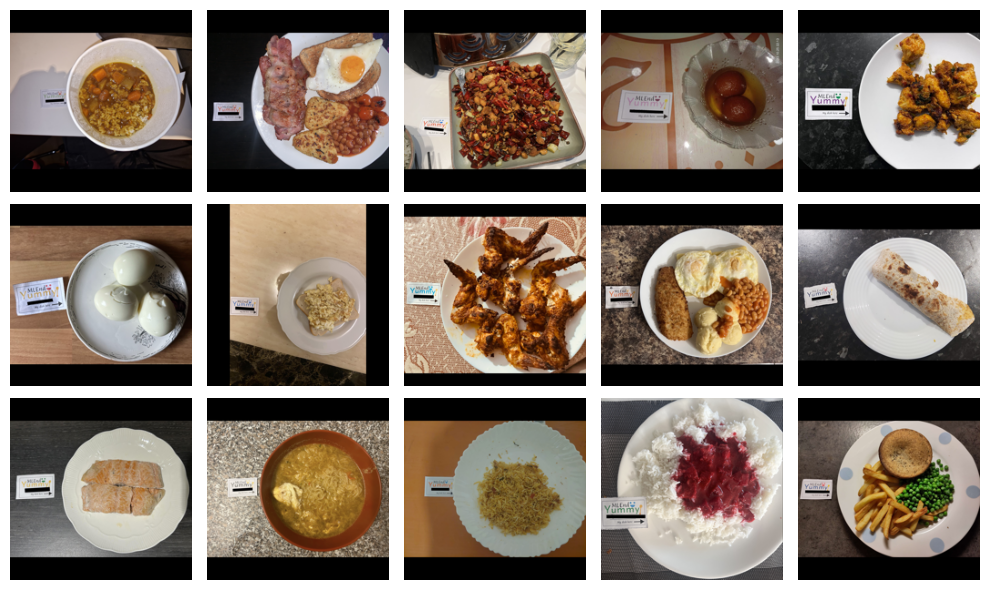

In [6]:
# Showing few of the images after preprocessing
plt.figure(figsize=(10,6))
for k,I in enumerate(x_train):
  plt.subplot(3,5,k+1)
  plt.imshow(I)
  plt.axis('off')
  k+=1
  if k>=15:break
plt.tight_layout()
plt.show()

Now that we have preprocessed the image, we can extract the features from the image that will help us train the model.

In [8]:
from skimage.feature import ORB
from skimage.feature import graycomatrix, graycoprops

# Feature selection using Linear Binay Pattern
def LBR_features(I):
    Ig = (rgb2gray(I)*255).astype('uint8')
    lbp = ski.feature.local_binary_pattern(Ig, P=8, R=1, method = 'uniform')
    hist, _ = np.histogram(lbp, bins=np.arange(0, lbp.max() + 1), density=True)
    return hist

# Feature selection using GLMC
def GLMC_features(I):
  Ig = (rgb2gray(I)*255).astype('uint8')
  glcm = graycomatrix(Ig, distances=[5], angles=[0], levels=256,
                        symmetric=True, normed=True)
  f1 = graycoprops(glcm, 'dissimilarity')[0, 0]
  f2 = graycoprops(glcm, 'correlation')[0, 0]
  return f1,f2

'''
This method takes image dataset for train and test that we created in the last step and
extracts LBR feature and GLMC features.

Returns: nd array of feature for train and test image dataset.

'''
def extract_feature(X_train_, X_test_):
  X_train_f = []
  for k, I in enumerate(X_train_):
    f1 = LBR_features(I)
    f2,f3 = GLMC_features(I)
    f1 = np.append(f1, [f2,f3])
    X_train_f.append(f1.tolist())

  X_test_f = []
  for k, I in enumerate(X_test_):
    f1 = LBR_features(I)
    f2,f3 = GLMC_features(I)
    f1 = np.append(f1, [f2,f3])
    X_test_f.append(f1.tolist())

  return np.array(X_train_f), np.array(X_test_f)

x_train_feature, x_test_feature = extract_feature(x_train, x_test)

In [10]:
display(x_train_feature)

array([[ 0.02915   ,  0.0511    ,  0.026025  , ...,  0.4273    ,
        12.16266667,  0.93863585],
       [ 0.0334    ,  0.053325  ,  0.03675   , ...,  0.427375  ,
        18.36994872,  0.87587185],
       [ 0.040525  ,  0.061     ,  0.039175  , ...,  0.42225   ,
        24.31453846,  0.86137026],
       ...,
       [ 0.02685   ,  0.04745   ,  0.032     , ...,  0.4114    ,
        11.87797436,  0.92945635],
       [ 0.038625  ,  0.059575  ,  0.03475   , ...,  0.38945   ,
        17.20789744,  0.86087986],
       [ 0.0554    ,  0.0842    ,  0.039025  , ...,  0.38635   ,
        23.58387179,  0.84523816]])

array([[ 0.02915   ,  0.0511    ,  0.026025  , ...,  0.4273    ,
        12.16266667,  0.93863585],
       [ 0.0334    ,  0.053325  ,  0.03675   , ...,  0.427375  ,
        18.36994872,  0.87587185],
       [ 0.040525  ,  0.061     ,  0.039175  , ...,  0.42225   ,
        24.31453846,  0.86137026],
       ...,
       [ 0.02685   ,  0.04745   ,  0.032     , ...,  0.4114    ,
        11.87797436,  0.92945635],
       [ 0.038625  ,  0.059575  ,  0.03475   , ...,  0.38945   ,
        17.20789744,  0.86087986],
       [ 0.0554    ,  0.0842    ,  0.039025  , ...,  0.38635   ,
        23.58387179,  0.84523816]])

Now that we have feature dataset for training and testing, let's implement a normalisation stage to ensure that the attributes in the new prediction space take on a similar range of values. We will implement standardisation.

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

def standardisation(x_train_feature_, x_test_feature_):
  MEAN = x_train_feature_.mean(0)
  SD = x_train_feature_.std(0)

  X_train_fn = (x_train_feature_ - MEAN)/SD
  X_test_fn = (x_test_feature_ - MEAN)/SD
  return X_train_fn, X_test_fn

x_train_std, x_test_std = standardisation(x_train_feature, x_test_feature)

def text_feature_extraction_without_norm(train_ingredients, x_test_feature):
  # Extracting text features from food ingredients
  vectorizer = TfidfVectorizer()
  X_text_train = vectorizer.fit_transform(train_ingredients)
  X_text_test = vectorizer.transform(test_ingredients)

  # Applying dimentionality reduction using TruncatedSVD
  # Taking n_components as 11 because I have taken 11 features from image
  # and the shape should be same for hstack that I am doing later.
  svd = TruncatedSVD(n_components=11)
  X_text_train_pca = svd.fit_transform(X_text_train)
  X_text_test_pca = svd.transform(X_text_test)

  # Horizontally Stacking the image features and text features for train and test.
  X_train_combine = np.hstack((x_train_feature, X_text_train_pca))
  X_test_combine = np.hstack((x_test_feature, X_text_test_pca))

  return X_train_combine, X_test_combine


def text_feature_extraction_with_norm(train_ingredients, x_train_std):
  # Extracting text features from food ingredients
  vectorizer = TfidfVectorizer()
  X_text_train = vectorizer.fit_transform(train_ingredients)
  X_text_test = vectorizer.transform(test_ingredients)

  # Applying dimentionality reduction using TruncatedSVD
  # Taking n_components as 11 because I have taken 11 features from image
  # and the shape should be same for hstack that I am doing later.
  svd = TruncatedSVD(n_components=11)
  X_text_train_pca = svd.fit_transform(X_text_train)
  X_text_test_pca = svd.transform(X_text_test)

  # Horizontally Stacking the image features and text features for train and test.
  X_train_combine = np.hstack((x_train_std, X_text_train_pca))
  X_test_combine = np.hstack((x_test_std, X_text_test_pca))

  return X_train_combine, X_test_combine

X_train_combine, X_test_combine = text_feature_extraction_without_norm(train_ingredients, x_test_feature)
X_train_combine_n, X_test_combine_n = text_feature_extraction_with_norm(train_ingredients, x_train_std)

In [17]:
display(x_train_std)

array([[-0.96547004, -0.6627646 , -0.90185192, ..., -0.18765177,
        -0.87491662,  0.91352634],
       [-0.63301382, -0.47337108,  0.19491893, ..., -0.18656582,
         0.22467474, -0.00558478],
       [-0.07566076,  0.17993016,  0.44290674, ..., -0.26077212,
         1.27773137, -0.21794506],
       ...,
       [-1.14538752, -0.97345509, -0.2908304 , ..., -0.41787229,
        -0.92534855,  0.77910253],
       [-0.22428824,  0.05863318, -0.0096071 , ..., -0.73569246,
         0.01882272, -0.22512642],
       [ 1.08793599,  2.15472998,  0.42756729, ..., -0.78057822,
         1.14829715, -0.45418223]])

# 8 Results
The results shows the following data:-

Using RandomForestClassifier (n_estimators=100, max_depth=100, random_state=42) **[Clearly a case of overfitting hence ignoring]**
  - Without normalization the `Training Accuracy is 1.0` and `Test Accuracy is 0.7743589743589744`
  - After normalisation the `Training Accuracy is 1.0` and `Test Accuracy is 0.7682051282051282`.


Using RandomForestClassifier (n_estimators=12, max_depth=3, random_state=42)
  - Without normalization the `Training Accuracy is 0.7503296703296704` and `Test Accuracy is 0.7282051282051282`
  - After normalisation the `Training Accuracy is 0.7485714285714286` and `Test Accuracy is 0.7241025641025641`.


Using LogisticRegression
 - After normalisation the `Training Accuracy is 0.7753846153846153`, and `Test Accuracy is 0.7528205128205128`




# Training the model using RandomForestClassifier with dataset that is not Normalized   

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

def trainRfModel(x_train_std, Y_train, n_estimators=12, max_depth=3, random_state=42):
  # Training model Random Forest Classifier using train dataset
  rf_classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
  rf_classifier.fit(x_train_std, Y_train)
  return rf_classifier


def trainLogistic(x_train_std, Y_train):
  logistic = LogisticRegression()
  logistic.fit(x_train_std, Y_train)
  return logistic


rf_classifier = trainRfModel(X_train_combine, y_train_cuisine)
logReg = trainLogistic(X_train_combine, y_train_cuisine)

In [40]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np


# Testing our model by predicting for test dataset
y_pred_train = rf_classifier.predict(X_train_combine)
y_pred_test = rf_classifier.predict(X_test_combine)

print('Training Accuracy is {}, and Test Accuracy is {}'.format(np.mean(y_train_cuisine==y_pred_train), np.mean(y_test_cuisine==y_pred_test)))

report = classification_report(y_test_cuisine, y_pred_test, target_names=['Asian', 'Non-Asian'])
print('Classification Report')
print(report)

confusion_met = confusion_matrix(y_test_cuisine, y_pred_test)
print('Confusion Matrix')
print(confusion_met)

accuracy_sc = accuracy_score(y_test_cuisine, y_pred_test)
precision_sc = precision_score(y_test_cuisine, y_pred_test)
recall_sc = recall_score(y_test_cuisine, y_pred_test)
f1_sc = f1_score(y_test_cuisine, y_pred_test)

print('************************** Evaluate Model ************************** ')
print('Accuracy is {}, Precision is {}, Recall is {}, F1 Score is {}'.format(accuracy_sc, precision_sc, recall_sc, f1_sc))

Training Accuracy is 0.7503296703296704, and Test Accuracy is 0.7333333333333333
Classification Report
              precision    recall  f1-score   support

       Asian       0.69      0.60      0.64       387
   Non-Asian       0.76      0.82      0.79       588

    accuracy                           0.73       975
   macro avg       0.72      0.71      0.71       975
weighted avg       0.73      0.73      0.73       975

Confusion Matrix
[[232 155]
 [105 483]]
************************** Evaluate Model ************************** 
Accuracy is 0.7333333333333333, Precision is 0.7570532915360502, Recall is 0.8214285714285714, F1 Score is 0.7879282218597063


# Training the model using RandomForestClassifier with dataset that is Normalized   



In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD


# Testing our model by predicting for test dataset
y_pred_train = rf_classifier.predict(X_train_combine_n)
y_pred_test = rf_classifier.predict(X_test_combine_n)

print('Training Accuracy is {}, and Test Accuracy is {}'.format(np.mean(y_train_cuisine==y_pred_train), np.mean(y_test_cuisine==y_pred_test)))

report = classification_report(y_test_cuisine, y_pred_test, target_names=['Asian', 'Non-Asian'])
print('Classification Report')
print(report)

confusion_met = confusion_matrix(y_test_cuisine, y_pred_test)
print('Confusion Matrix')
print(confusion_met)

accuracy_sc = accuracy_score(y_test_cuisine, y_pred_test)
precision_sc = precision_score(y_test_cuisine, y_pred_test)
recall_sc = recall_score(y_test_cuisine, y_pred_test)
f1_sc = f1_score(y_test_cuisine, y_pred_test)

print('************************** Evaluate Model ************************** ')
print('Accuracy is {}, Precision is {}, Recall is {}, F1 Score is {}'.format(accuracy_sc, precision_sc, recall_sc, f1_sc))

Training Accuracy is 0.7393406593406593, and Test Accuracy is 0.7251282051282051
Classification Report
              precision    recall  f1-score   support

       Asian       0.68      0.58      0.63       387
   Non-Asian       0.75      0.82      0.78       588

    accuracy                           0.73       975
   macro avg       0.71      0.70      0.70       975
weighted avg       0.72      0.73      0.72       975

Confusion Matrix
[[225 162]
 [106 482]]
************************** Evaluate Model ************************** 
Accuracy is 0.7251282051282051, Precision is 0.7484472049689441, Recall is 0.8197278911564626, F1 Score is 0.7824675324675324


# Training the model using LogisticRegression with Normalized data   


In [42]:
from sklearn.linear_model import LogisticRegression

y_train_p = logReg.predict(X_train_combine_n)
y_test_p = logReg.predict(X_test_combine_n)

print('Training Accuracy is {}, and Test Accuracy is {}'.format(np.mean(y_train_cuisine==y_train_p), np.mean(y_test_cuisine==y_test_p)))

report = classification_report(y_test_cuisine, y_pred_test, target_names=['Asian', 'Non-Asian'])
print('Classification Report')
print(report)

confusion_met = confusion_matrix(y_test_cuisine, y_pred_test)
print('Confusion Matrix')
print(confusion_met)

accuracy_sc = accuracy_score(y_test_cuisine, y_pred_test)
precision_sc = precision_score(y_test_cuisine, y_pred_test)
recall_sc = recall_score(y_test_cuisine, y_pred_test)
f1_sc = f1_score(y_test_cuisine, y_pred_test)

print('************************** Evaluate Model ************************** ')
print('Accuracy is {}, Precision is {}, Recall is {}, F1 Score is {}'.format(accuracy_sc, precision_sc, recall_sc, f1_sc))

Training Accuracy is 0.7002197802197803, and Test Accuracy is 0.6923076923076923
Classification Report
              precision    recall  f1-score   support

       Asian       0.68      0.58      0.63       387
   Non-Asian       0.75      0.82      0.78       588

    accuracy                           0.73       975
   macro avg       0.71      0.70      0.70       975
weighted avg       0.72      0.73      0.72       975

Confusion Matrix
[[225 162]
 [106 482]]
************************** Evaluate Model ************************** 
Accuracy is 0.7251282051282051, Precision is 0.7484472049689441, Recall is 0.8197278911564626, F1 Score is 0.7824675324675324


Classification Report
              precision    recall  f1-score   support

           0       0.62      0.57      0.59       387
           1       0.73      0.77      0.75       588

    accuracy                           0.69       975
   macro avg       0.68      0.67      0.67       975
weighted avg       0.69      0.69      0.69       975

Confusion Matrix


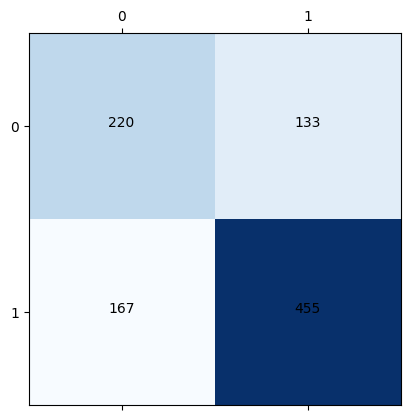

************************** Evaluate Model ************************** 
Accuracy is 0.6923076923076923, Precision is 0.7315112540192926, Recall is 0.7738095238095238, F1 Score is 0.7520661157024794


In [53]:
import numpy as np
import spkit as sp
import matplotlib.pyplot as plt
from mlend import download_yummy_small, yummy_small_load
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from skimage import exposure
from skimage.color import rgb2hsv, rgb2gray
import skimage as ski

# Helper function to show confusion matrix
def showConfMat(CM, labels = ['0','1']):
  plt.matshow(CM,cmap='Blues')
  for i in range(CM.shape[0]):
    for j in range(CM.shape[1]):
      plt.text(i,j,CM[i,j].round(2),ha='center',)
  plt.xticks([0,1],labels)
  plt.yticks([0,1],labels)
  plt.show()

def evaluate_model(yt, yp):
  report = classification_report(yt, yp, target_names=['0', '1'])
  print('Classification Report')
  print(report)

  confusion_met = confusion_matrix(yt, yp)
  print('Confusion Matrix')
  showConfMat(confusion_met)

  accuracy_sc = accuracy_score(yt, yp)
  precision_sc = precision_score(yt, yp)
  recall_sc = recall_score(yt, yp)
  f1_sc = f1_score(yt, yp)

  print('************************** Evaluate Model ************************** ')
  print('Accuracy is {}, Precision is {}, Recall is {}, F1 Score is {}'.format(accuracy_sc, precision_sc, recall_sc, f1_sc))


def ml_pipeline(X_train_paths, X_test_paths, y_train, y_test):

    # Step 1:- Image dataset creation and Pre-processing
    x_train, x_test = convert_to_image_data(x_train_paths, x_test_paths)

    # Step 2:- Image Feature extraction
    x_train_feature, x_test_feature = extract_feature(x_train, x_test)

    # Step 3: Normalization/Standardisation
    x_train_std, x_test_std = standardisation(x_train_feature, x_test_feature)

    # Step 3:- Text Feature extraction
    X_train_combine_n, X_test_combine_n = text_feature_extraction_with_norm(train_ingredients, x_train_std)

    # Step 4:- Training Model
    rf = trainRfModel(X_train_combine_n, y_train_cuisine)

    # Stage 5: Model Testing and Evaluation
    ys_p = logReg.predict(X_test_combine_n)
    evaluate_model(y_test, ys_p)



ml_pipeline(x_train_paths, x_test_paths, y_train_cuisine, y_test_cuisine)

# 9 Conclusions


The result of Logistic Regression model is better than Random Forest. Logistic Regression predicts the training data and test data with very little difference which suggests the model is no overfitted or underfit. This concludes that this model is the best for this promblem as there is no over fitting of data.

The second conclusion we can draw is fine tuning the Random Forest model where the accuracy of model was optemised by changing the parameters of the model. In above block I have shown the scenario of overfitting and how I have fine tuned it to get the best result. Moreover, we can also see how normalisation has improved the performance of the model as well.

We can even improve on the performance because as we see there are few false-positive and true-negative which we can analyse and add some improvement. The recall for Non-Asian label is more which means there is some biasness in the data which can be improved.

